In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Australia_2020

In [5]:
Australia_2020

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
4,4,SA Abbott (AUS),1,1,0,4,4,4.00,9,44.44,...,84,1,1/84,84.00,8.40,60.0,0,0,0,0
8,8,AC Agar (AUS),5,4,1,73,28,24.33,74,98.64,...,249,4,2/44,62.25,5.29,70.5,0,0,3,0
42,42,AT Carey (AUS),13,11,1,287,106,28.70,315,91.11,...,-,-,-,-,-,-,-,-,15,0
52,52,PJ Cummins (AUS),11,9,3,51,14*,8.50,59,86.44,...,592,15,3/25,39.46,5.74,41.2,0,0,3,0
73,73,AJ Finch (AUS),13,13,1,673,114,56.08,824,81.67,...,20,0,-,-,6.66,-,0,0,4,0
77,77,C Green (AUS),1,1,0,21,21,21.00,27,77.77,...,27,0,-,-,6.75,-,0,0,0,0
83,83,JR Hazlewood (AUS),10,5,4,16,7*,16.00,23,69.56,...,493,16,3/26,30.81,5.00,36.9,0,0,3,0
86,86,MC Henriques (AUS),2,2,1,24,22,24.00,32,75.00,...,41,1,1/34,41.00,5.12,48.0,0,0,1,0
118,118,M Labuschagne (AUS),13,12,0,473,108,39.41,519,91.13,...,36,0,-,-,9.00,-,0,0,4,0
131,131,MR Marsh (AUS),7,7,0,187,73,26.71,253,73.91,...,239,5,3/29,47.80,5.75,49.8,0,0,3,0


In [6]:
Australia_2020=Australia_2020.reset_index()

In [7]:
Australia_2020

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,4,4,SA Abbott (AUS),1,1,0,4,4,4.00,9,...,84,1,1/84,84.00,8.40,60.0,0,0,0,0
1,8,8,AC Agar (AUS),5,4,1,73,28,24.33,74,...,249,4,2/44,62.25,5.29,70.5,0,0,3,0
2,42,42,AT Carey (AUS),13,11,1,287,106,28.70,315,...,-,-,-,-,-,-,-,-,15,0
3,52,52,PJ Cummins (AUS),11,9,3,51,14*,8.50,59,...,592,15,3/25,39.46,5.74,41.2,0,0,3,0
4,73,73,AJ Finch (AUS),13,13,1,673,114,56.08,824,...,20,0,-,-,6.66,-,0,0,4,0
5,77,77,C Green (AUS),1,1,0,21,21,21.00,27,...,27,0,-,-,6.75,-,0,0,0,0
6,83,83,JR Hazlewood (AUS),10,5,4,16,7*,16.00,23,...,493,16,3/26,30.81,5.00,36.9,0,0,3,0
7,86,86,MC Henriques (AUS),2,2,1,24,22,24.00,32,...,41,1,1/34,41.00,5.12,48.0,0,0,1,0
8,118,118,M Labuschagne (AUS),13,12,0,473,108,39.41,519,...,36,0,-,-,9.00,-,0,0,4,0
9,131,131,MR Marsh (AUS),7,7,0,187,73,26.71,253,...,239,5,3/29,47.80,5.75,49.8,0,0,3,0


In [8]:
Australia_2020.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Australia_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,SA Abbott (AUS),1,1,0,4,4,4.00,9,44.44,0,...,84,1,1/84,84.00,8.40,60.0,0,0,0,0
1,AC Agar (AUS),5,4,1,73,28,24.33,74,98.64,0,...,249,4,2/44,62.25,5.29,70.5,0,0,3,0
2,AT Carey (AUS),13,11,1,287,106,28.70,315,91.11,1,...,-,-,-,-,-,-,-,-,15,0
3,PJ Cummins (AUS),11,9,3,51,14*,8.50,59,86.44,0,...,592,15,3/25,39.46,5.74,41.2,0,0,3,0
4,AJ Finch (AUS),13,13,1,673,114,56.08,824,81.67,2,...,20,0,-,-,6.66,-,0,0,4,0
5,C Green (AUS),1,1,0,21,21,21.00,27,77.77,0,...,27,0,-,-,6.75,-,0,0,0,0
6,JR Hazlewood (AUS),10,5,4,16,7*,16.00,23,69.56,0,...,493,16,3/26,30.81,5.00,36.9,0,0,3,0
7,MC Henriques (AUS),2,2,1,24,22,24.00,32,75.00,0,...,41,1,1/34,41.00,5.12,48.0,0,0,1,0
8,M Labuschagne (AUS),13,12,0,473,108,39.41,519,91.13,1,...,36,0,-,-,9.00,-,0,0,4,0
9,MR Marsh (AUS),7,7,0,187,73,26.71,253,73.91,0,...,239,5,3/29,47.80,5.75,49.8,0,0,3,0


In [10]:
Australia_2020_players =Australia_2020.copy()

In [11]:
Australia_2020_players.drop('Player',axis=1,inplace=True)

In [12]:
Australia_2020_players.HS=Australia_2020_players.HS.str.extract('(\d+)')
Australia_2020_players['HS'].fillna(value=0, inplace=True)


In [13]:
Australia_2020_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,1,1,0,4,4,4.00,9,44.44,0,0,...,84,1,1/84,84.00,8.40,60.0,0,0,0,0
1,5,4,1,73,28,24.33,74,98.64,0,0,...,249,4,2/44,62.25,5.29,70.5,0,0,3,0
2,13,11,1,287,106,28.70,315,91.11,1,0,...,-,-,-,-,-,-,-,-,15,0
3,11,9,3,51,14,8.50,59,86.44,0,0,...,592,15,3/25,39.46,5.74,41.2,0,0,3,0
4,13,13,1,673,114,56.08,824,81.67,2,5,...,20,0,-,-,6.66,-,0,0,4,0
5,1,1,0,21,21,21.00,27,77.77,0,0,...,27,0,-,-,6.75,-,0,0,0,0
6,10,5,4,16,7,16.00,23,69.56,0,0,...,493,16,3/26,30.81,5.00,36.9,0,0,3,0
7,2,2,1,24,22,24.00,32,75.00,0,0,...,41,1,1/34,41.00,5.12,48.0,0,0,1,0
8,13,12,0,473,108,39.41,519,91.13,1,3,...,36,0,-,-,9.00,-,0,0,4,0
9,7,7,0,187,73,26.71,253,73.91,0,1,...,239,5,3/29,47.80,5.75,49.8,0,0,3,0


In [14]:
Australia_2020_players.replace("-",0,inplace=True)

In [15]:
Australia_2020_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Australia_2020_players_scaled = pd.DataFrame(scaler.fit_transform(Australia_2020_players),columns=Australia_2020_players.columns)
Australia_2020_players_scaled.shape
Australia_2020_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.364059,-1.278275,-0.904534,-0.825901,-1.095656,-1.031660,-0.796658,-1.455946,-0.559233,-0.622543,...,-0.441836,-0.431481,-0.463549,1.412042,1.185583,0.894888,-0.229416,0.0,-0.862662,0.0
1,-0.476866,-0.511310,-0.043073,-0.495061,-0.560646,-0.021879,-0.509614,0.177713,-0.559233,-0.622543,...,-0.021040,0.313619,-0.048430,0.855107,-0.053383,1.189582,-0.229416,0.0,-0.053916,0.0
2,1.297519,1.278275,-0.043073,0.531022,1.178137,0.195176,0.554657,-0.049251,0.683507,-0.622543,...,-0.441836,-0.810805,-0.601921,-0.738880,-2.160820,-0.789079,-0.229416,0.0,3.181067,0.0
3,0.853923,0.766965,1.679849,-0.600547,-0.872735,-0.808147,-0.575854,-0.190011,-0.559233,-0.622543,...,2.924534,1.862525,1.473669,0.271541,0.125888,0.367245,-0.229416,0.0,-0.053916,0.0
4,1.297519,1.789585,-0.043073,2.381808,1.356473,1.555126,2.802433,-0.333785,1.926246,2.836029,...,-0.441836,-0.720489,-0.601921,-0.738880,0.492399,-0.789079,-0.229416,0.0,0.215666,0.0


In [17]:
Australia_2020_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.0,2.000000e+01,20.0
mean,-5.551115e-17,0.000000,-6.661338e-17,-1.665335e-17,5.551115e-17,-1.165734e-16,0.000000,-1.110223e-17,-5.551115e-17,2.220446e-17,...,5.551115e-18,-4.440892e-17,0.000000,-1.110223e-17,-1.845746e-16,2.159731e-17,-1.332268e-16,0.0,-4.996004e-17,0.0
std,1.025978e+00,1.025978,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978,1.025978e+00,1.025978e+00,1.025978e+00,...,1.025978e+00,1.025978e+00,1.025978,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,0.0,1.025978e+00,0.0
min,-1.364059e+00,-1.278275,-9.045340e-01,-8.259013e-01,-1.095656e+00,-1.230338e+00,-0.796658,-1.455946e+00,-5.592328e-01,-6.225430e-01,...,-4.418361e-01,-8.108045e-01,-0.601921,-7.388804e-01,-2.160820e+00,-7.890787e-01,-2.294157e-01,0.0,-8.626622e-01,0.0
25%,-9.204625e-01,-1.022620,-9.045340e-01,-7.300056e-01,-7.891398e-01,-8.081470e-01,-0.719376,-5.430410e-01,-5.592328e-01,-6.225430e-01,...,-4.418361e-01,-6.967816e-01,-0.601921,-7.388804e-01,-1.330593e-01,-7.890787e-01,-2.294157e-01,0.0,-6.604757e-01,0.0
50%,-1.441688e-01,-0.127827,-4.307305e-02,-5.837648e-01,-6.052301e-01,-1.127745e-01,-0.582479,-1.196309e-01,-5.592328e-01,-6.225430e-01,...,-4.418361e-01,-5.443747e-01,-0.532735,-4.349345e-01,1.497914e-01,-3.905399e-01,-2.294157e-01,0.0,-5.391639e-02,0.0
75%,9.093726e-01,0.766965,1.722922e-01,6.101361e-01,1.189283e+00,4.510981e-01,0.349310,2.482439e-01,6.835067e-01,2.421001e-01,...,-2.103981e-02,2.797513e-01,0.089942,3.545054e-01,5.043507e-01,5.707244e-01,-2.294157e-01,0.0,2.156655e-01,0.0
max,1.297519e+00,1.789585,2.541310e+00,2.381808e+00,1.735439e+00,2.276327e+00,2.802433,3.232837e+00,3.168986e+00,2.836029e+00,...,2.924534e+00,2.128955e+00,3.134141,3.306903e+00,1.424611e+00,3.196309e+00,4.358899e+00,0.0,3.181067e+00,0.0


In [18]:
X =  Australia_2020_players_scaled.iloc[:,:].values

In [19]:
X

array([[-1.36405892e+00, -1.27827498e+00, -9.04534034e-01,
        -8.25901287e-01, -1.09565592e+00, -1.03165964e+00,
        -7.96657542e-01, -1.45594601e+00, -5.59232789e-01,
        -6.22543017e-01, -5.35303379e-01, -7.60100985e-01,
        -5.60116184e-01, -1.68488441e+00, -1.36405892e+00,
        -7.56670089e-01, -5.28673078e-01, -4.41836082e-01,
        -4.31480774e-01, -4.63548509e-01,  1.41204246e+00,
         1.18558266e+00,  8.94887936e-01, -2.29415734e-01,
         0.00000000e+00, -8.62662186e-01,  0.00000000e+00],
       [-4.76866128e-01, -5.11309993e-01, -4.30730492e-02,
        -4.95061294e-01, -5.60645910e-01, -2.18793997e-02,
        -5.09613527e-01,  1.77713185e-01, -5.59232789e-01,
        -6.22543017e-01, -5.35303379e-01, -5.05886609e-01,
        -5.60116184e-01, -1.63490637e+00, -4.76866128e-01,
         2.35684126e-01,  3.79868673e-01, -2.10398134e-02,
         3.13619464e-01, -4.84304412e-02,  8.55107071e-01,
        -5.33830904e-02,  1.18958210e+00, -2.29415734e-

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Australia_2020_players_scaled))

False

In [23]:
Australia_2020_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.364059,-1.278275,-0.904534,-0.825901,-1.095656,-1.031660,-0.796658,-1.455946,-0.559233,-0.622543,...,-0.441836,-0.431481,-0.463549,1.412042,1.185583,0.894888,-0.229416,0.0,-0.862662,0.0
1,-0.476866,-0.511310,-0.043073,-0.495061,-0.560646,-0.021879,-0.509614,0.177713,-0.559233,-0.622543,...,-0.021040,0.313619,-0.048430,0.855107,-0.053383,1.189582,-0.229416,0.0,-0.053916,0.0
2,1.297519,1.278275,-0.043073,0.531022,1.178137,0.195176,0.554657,-0.049251,0.683507,-0.622543,...,-0.441836,-0.810805,-0.601921,-0.738880,-2.160820,-0.789079,-0.229416,0.0,3.181067,0.0
3,0.853923,0.766965,1.679849,-0.600547,-0.872735,-0.808147,-0.575854,-0.190011,-0.559233,-0.622543,...,2.924534,1.862525,1.473669,0.271541,0.125888,0.367245,-0.229416,0.0,-0.053916,0.0
4,1.297519,1.789585,-0.043073,2.381808,1.356473,1.555126,2.802433,-0.333785,1.926246,2.836029,...,-0.441836,-0.720489,-0.601921,-0.738880,0.492399,-0.789079,-0.229416,0.0,0.215666,0.0
5,-1.364059,-1.278275,-0.904534,-0.744390,-0.716690,-0.187279,-0.717168,-0.451336,-0.559233,-0.622543,...,-0.441836,-0.688879,-0.601921,-0.738880,0.528254,-0.789079,-0.229416,0.0,-0.862662,0.0
6,0.632125,-0.255655,2.541310,-0.768364,-1.028780,-0.435626,-0.734833,-0.698796,-0.559233,-0.622543,...,2.924534,1.415465,1.612042,0.050047,-0.168914,0.246561,-0.229416,0.0,-0.053916,0.0
7,-1.142261,-1.022620,-0.043073,-0.730006,-0.694398,-0.038270,-0.695088,-0.534827,-0.559233,-0.622543,...,-0.441836,-0.625658,-0.463549,0.310975,-0.121108,0.558095,-0.229416,0.0,-0.593080,0.0
8,1.297519,1.533930,-0.904534,1.422852,1.222721,0.727136,1.455534,-0.048648,0.683507,1.452600,...,-0.441836,-0.648237,-0.601921,-0.738880,1.424611,-0.789079,-0.229416,0.0,0.215666,0.0
9,-0.033270,0.255655,-0.904534,0.051544,0.442498,0.096334,0.280862,-0.567682,-0.559233,0.069171,...,0.399756,0.268462,0.089942,0.485097,0.129872,0.608614,-0.229416,0.0,-0.053916,0.0


In [24]:
np.all(np.isfinite(Australia_2020_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


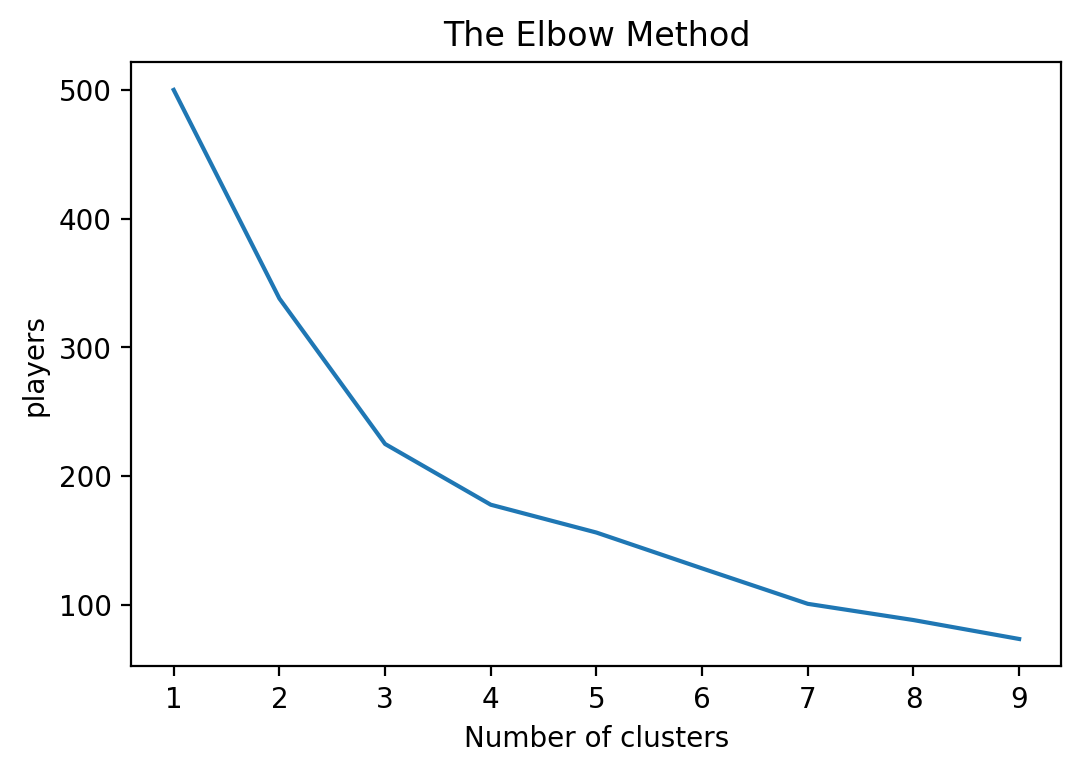

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0])

In [28]:
kmeans.cluster_centers_

array([[ 0.90937262,  0.31956875,  1.67984892, -0.66767346, -0.92289227,
        -0.72495069, -0.62884719, -0.45329522, -0.55923279, -0.62254302,
         0.99413485, -0.67112595, -0.38230152,  0.1549319 ,  0.90937262,
         1.78623759,  1.88141808,  1.34654806,  1.87268527,  1.81960086,
         0.2102143 ,  0.03226888,  0.32093597,  0.91766294,  0.        ,
         0.28306103,  0.        ],
       [-0.89828271, -0.81809599, -0.47380354, -0.57753155, -0.46924837,
        -0.46274558, -0.53699311,  0.01690928, -0.55923279, -0.48420012,
        -0.38235956, -0.52622376, -0.48899032, -0.05185221, -0.89828271,
        -0.38453726, -0.36513556, -0.27351757, -0.36284124, -0.3805249 ,
        -0.04533582,  0.07529406, -0.05346594, -0.22941573,  0.        ,
        -0.62003845,  0.        ],
       [ 0.89088943,  1.15044748, -0.33022671,  1.40766823,  1.39734213,
         1.25454309,  1.31421998,  0.27401468,  1.30487651,  1.22202889,
        -0.02549064,  1.3244569 ,  1.06985155, -0.0168

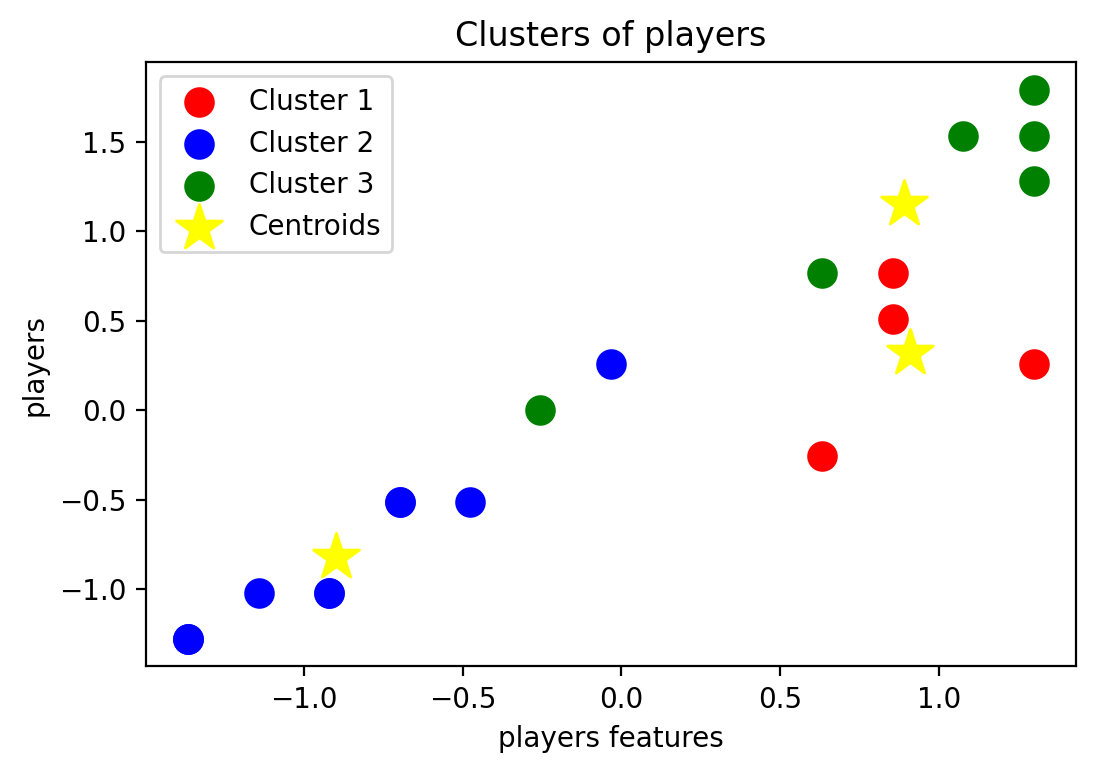

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Australia_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,SA Abbott (AUS),1,1,0,4,4,4.00,9,44.44,0,...,84,1,1/84,84.00,8.40,60.0,0,0,0,0
1,AC Agar (AUS),5,4,1,73,28,24.33,74,98.64,0,...,249,4,2/44,62.25,5.29,70.5,0,0,3,0
2,AT Carey (AUS),13,11,1,287,106,28.70,315,91.11,1,...,-,-,-,-,-,-,-,-,15,0
3,PJ Cummins (AUS),11,9,3,51,14*,8.50,59,86.44,0,...,592,15,3/25,39.46,5.74,41.2,0,0,3,0
4,AJ Finch (AUS),13,13,1,673,114,56.08,824,81.67,2,...,20,0,-,-,6.66,-,0,0,4,0
5,C Green (AUS),1,1,0,21,21,21.00,27,77.77,0,...,27,0,-,-,6.75,-,0,0,0,0
6,JR Hazlewood (AUS),10,5,4,16,7*,16.00,23,69.56,0,...,493,16,3/26,30.81,5.00,36.9,0,0,3,0
7,MC Henriques (AUS),2,2,1,24,22,24.00,32,75.00,0,...,41,1,1/34,41.00,5.12,48.0,0,0,1,0
8,M Labuschagne (AUS),13,12,0,473,108,39.41,519,91.13,1,...,36,0,-,-,9.00,-,0,0,4,0
9,MR Marsh (AUS),7,7,0,187,73,26.71,253,73.91,0,...,239,5,3/29,47.80,5.75,49.8,0,0,3,0


In [31]:
Australia_2020["cluster"] = y_kmeans

In [32]:
Australia_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,SA Abbott (AUS),1,1,0,4,4,4.00,9,44.44,0,...,1,1/84,84.00,8.40,60.0,0,0,0,0,1
1,AC Agar (AUS),5,4,1,73,28,24.33,74,98.64,0,...,4,2/44,62.25,5.29,70.5,0,0,3,0,1
2,AT Carey (AUS),13,11,1,287,106,28.70,315,91.11,1,...,-,-,-,-,-,-,-,15,0,2
3,PJ Cummins (AUS),11,9,3,51,14*,8.50,59,86.44,0,...,15,3/25,39.46,5.74,41.2,0,0,3,0,0
4,AJ Finch (AUS),13,13,1,673,114,56.08,824,81.67,2,...,0,-,-,6.66,-,0,0,4,0,2
5,C Green (AUS),1,1,0,21,21,21.00,27,77.77,0,...,0,-,-,6.75,-,0,0,0,0,1
6,JR Hazlewood (AUS),10,5,4,16,7*,16.00,23,69.56,0,...,16,3/26,30.81,5.00,36.9,0,0,3,0,0
7,MC Henriques (AUS),2,2,1,24,22,24.00,32,75.00,0,...,1,1/34,41.00,5.12,48.0,0,0,1,0,1
8,M Labuschagne (AUS),13,12,0,473,108,39.41,519,91.13,1,...,0,-,-,9.00,-,0,0,4,0,2
9,MR Marsh (AUS),7,7,0,187,73,26.71,253,73.91,0,...,5,3/29,47.80,5.75,49.8,0,0,3,0,1


In [33]:
Australia_2020['cluster'].value_counts()

1    10
2     6
0     4
Name: cluster, dtype: int64

In [34]:
Australia_Cluster_2020 = np.array([4,10,6])

In [35]:
Australia_Cluster_2020

array([ 4, 10,  6])

In [36]:
%store Australia_Cluster_2020

Stored 'Australia_Cluster_2020' (ndarray)


In [37]:
Australia_2020_players_scaled.insert(0, 'Player', Australia_2020.Player)

In [38]:
Australia_2020_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,SA Abbott (AUS),-1.364059,-1.278275,-0.904534,-0.825901,-1.095656,-1.031660,-0.796658,-1.455946,-0.559233,...,-0.441836,-0.431481,-0.463549,1.412042,1.185583,0.894888,-0.229416,0.0,-0.862662,0.0
1,AC Agar (AUS),-0.476866,-0.511310,-0.043073,-0.495061,-0.560646,-0.021879,-0.509614,0.177713,-0.559233,...,-0.021040,0.313619,-0.048430,0.855107,-0.053383,1.189582,-0.229416,0.0,-0.053916,0.0
2,AT Carey (AUS),1.297519,1.278275,-0.043073,0.531022,1.178137,0.195176,0.554657,-0.049251,0.683507,...,-0.441836,-0.810805,-0.601921,-0.738880,-2.160820,-0.789079,-0.229416,0.0,3.181067,0.0
3,PJ Cummins (AUS),0.853923,0.766965,1.679849,-0.600547,-0.872735,-0.808147,-0.575854,-0.190011,-0.559233,...,2.924534,1.862525,1.473669,0.271541,0.125888,0.367245,-0.229416,0.0,-0.053916,0.0
4,AJ Finch (AUS),1.297519,1.789585,-0.043073,2.381808,1.356473,1.555126,2.802433,-0.333785,1.926246,...,-0.441836,-0.720489,-0.601921,-0.738880,0.492399,-0.789079,-0.229416,0.0,0.215666,0.0
5,C Green (AUS),-1.364059,-1.278275,-0.904534,-0.744390,-0.716690,-0.187279,-0.717168,-0.451336,-0.559233,...,-0.441836,-0.688879,-0.601921,-0.738880,0.528254,-0.789079,-0.229416,0.0,-0.862662,0.0
6,JR Hazlewood (AUS),0.632125,-0.255655,2.541310,-0.768364,-1.028780,-0.435626,-0.734833,-0.698796,-0.559233,...,2.924534,1.415465,1.612042,0.050047,-0.168914,0.246561,-0.229416,0.0,-0.053916,0.0
7,MC Henriques (AUS),-1.142261,-1.022620,-0.043073,-0.730006,-0.694398,-0.038270,-0.695088,-0.534827,-0.559233,...,-0.441836,-0.625658,-0.463549,0.310975,-0.121108,0.558095,-0.229416,0.0,-0.593080,0.0
8,M Labuschagne (AUS),1.297519,1.533930,-0.904534,1.422852,1.222721,0.727136,1.455534,-0.048648,0.683507,...,-0.441836,-0.648237,-0.601921,-0.738880,1.424611,-0.789079,-0.229416,0.0,0.215666,0.0
9,MR Marsh (AUS),-0.033270,0.255655,-0.904534,0.051544,0.442498,0.096334,0.280862,-0.567682,-0.559233,...,0.399756,0.268462,0.089942,0.485097,0.129872,0.608614,-0.229416,0.0,-0.053916,0.0


In [39]:
Australia_2020_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,SA Abbott (AUS),-1.031660,1.412042
1,AC Agar (AUS),-0.021879,0.855107
2,AT Carey (AUS),0.195176,-0.738880
3,PJ Cummins (AUS),-0.808147,0.271541
4,AJ Finch (AUS),1.555126,-0.738880
5,C Green (AUS),-0.187279,-0.738880
6,JR Hazlewood (AUS),-0.435626,0.050047
7,MC Henriques (AUS),-0.038270,0.310975
8,M Labuschagne (AUS),0.727136,-0.738880
9,MR Marsh (AUS),0.096334,0.485097


In [40]:
Australia_2020_Ave=Australia_2020_players_scaled.mean()

In [41]:
Australia_2020_Ave

Mat_x          -5.551115e-17
Inns_x          0.000000e+00
NO             -6.661338e-17
Runs_x         -1.665335e-17
HS              5.551115e-17
Ave_x          -1.165734e-16
BF              0.000000e+00
SR_x           -1.110223e-17
100            -5.551115e-17
50              2.220446e-17
0               3.330669e-17
4s              4.440892e-17
6s             -1.110223e-17
Unnamed: 0_y    1.554312e-16
Mat_y          -5.551115e-17
Inns_y          4.440892e-17
Overs           1.554312e-16
Mdns            5.551115e-18
Runs_y         -4.440892e-17
Wkts            0.000000e+00
Ave_y          -1.110223e-17
Econ           -1.845746e-16
SR_y            2.159731e-17
4              -1.332268e-16
5               0.000000e+00
Ct             -4.996004e-17
St              0.000000e+00
dtype: float64

In [42]:
Australia_Ave_2020 =Australia_2020_Ave[['Ave_x','Ave_y']]

In [43]:
Australia_Ave_2020

Ave_x   -1.165734e-16
Ave_y   -1.110223e-17
dtype: float64

In [44]:
Australia_Ave_2020 = np.array([Australia_Ave_2020.Ave_x, Australia_Ave_2020.Ave_y])

In [45]:
Australia_Ave_2020

array([-1.16573418e-16, -1.11022302e-17])

In [46]:
%store Australia_Ave_2020

Stored 'Australia_Ave_2020' (ndarray)


In [47]:
Australia_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,SA Abbott (AUS),1,1,0,4,4,4.00,9,44.44,0,...,1,1/84,84.00,8.40,60.0,0,0,0,0,1
1,AC Agar (AUS),5,4,1,73,28,24.33,74,98.64,0,...,4,2/44,62.25,5.29,70.5,0,0,3,0,1
2,AT Carey (AUS),13,11,1,287,106,28.70,315,91.11,1,...,-,-,-,-,-,-,-,15,0,2
3,PJ Cummins (AUS),11,9,3,51,14*,8.50,59,86.44,0,...,15,3/25,39.46,5.74,41.2,0,0,3,0,0
4,AJ Finch (AUS),13,13,1,673,114,56.08,824,81.67,2,...,0,-,-,6.66,-,0,0,4,0,2
5,C Green (AUS),1,1,0,21,21,21.00,27,77.77,0,...,0,-,-,6.75,-,0,0,0,0,1
6,JR Hazlewood (AUS),10,5,4,16,7*,16.00,23,69.56,0,...,16,3/26,30.81,5.00,36.9,0,0,3,0,0
7,MC Henriques (AUS),2,2,1,24,22,24.00,32,75.00,0,...,1,1/34,41.00,5.12,48.0,0,0,1,0,1
8,M Labuschagne (AUS),13,12,0,473,108,39.41,519,91.13,1,...,0,-,-,9.00,-,0,0,4,0,2
9,MR Marsh (AUS),7,7,0,187,73,26.71,253,73.91,0,...,5,3/29,47.80,5.75,49.8,0,0,3,0,1
